In [61]:
#Imports
import pandas as pd
import snscrape.modules.twitter as sntwitter

In [62]:
#Initialize Tweet List
fake_vac_tweets_list = []
funny_tweet_list = []

In [63]:
#Pull tweets from Twitter API that contain "Fake vaccinations" in text of post
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Fake vaccinations').get_items()):
    if i > 999:
        break
    fake_vac_tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount])

In [64]:
#Create DataFrame
fake_vac_df = pd.DataFrame(fake_vac_tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Reply Count', 'Retweet Count', 'Like Count'])

In [65]:
#Convert Text column to lowercase for searching purposes
fake_vac_df['Text'] = fake_vac_df['Text'].str.lower()

In [66]:
# #Calculate number of tweets containg various words
# fear_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('fear')==True].count()
# hoax_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('hoax')==True].count()
# microchip_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('microchip')==True].count()
# conspiracy_num = fake_vac_df['Text'][fake_vac_df['Text'].str.contains('conspiracy')==True].count()
# gates_num = fake_vac_df['Text'][(fake_vac_df['Text'].str.contains('bill gates')==True)].count()

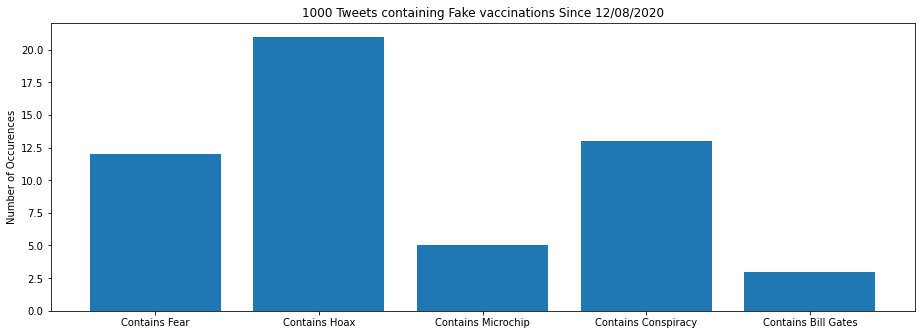

In [67]:
# #Create bargraph
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,1,2,1])
# ax.set_title('1000 Tweets containing Fake vaccinations Since 12/08/2020')
# ax.set_ylabel('Number of Occurences')
# labels = ['Contains Fear', 'Contains Hoax', 'Contains Microchip', 'Contains Conspiracy', 'Contains Bill Gates']
# count_tweets = [fear_num, hoax_num, microchip_num, conspiracy_num, gates_num]
# ax.bar(labels,count_tweets)
# plt.show()

# Fuzzy Matching Stuff

In [10]:
#Install fuzztwuzzy 
pip install fuzzywuzzy

SyntaxError: invalid syntax (<ipython-input-10-c2f6b963bff0>, line 2)

In [68]:
#Imports
from fuzzywuzzy import fuzz

In [69]:
#Method to determine if fuzzymatch or not
def fuzzy_match(str1: str, str2: str) -> bool:
    token_set_ratio = fuzz.token_set_ratio(str1, str2)
    if str2 in str1:
        return True
    if token_set_ratio > 55:
        return True
    else:
        return False

In [70]:
#Calculate number of tweets containg various words
#Should pass String comparing to in lower case because made all entries in Text column lowercase
fear_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'fear'))==True].count()
hoax_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'hoax'))==True].count()
microchip_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'microchip'))==True].count()
conspiracy_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'conspiracy'))==True].count()
gates_num = fake_vac_df['Text'][fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'bill gates'))==True].count()
funny_tweet_list.append(fake_vac_tweets_list[212])

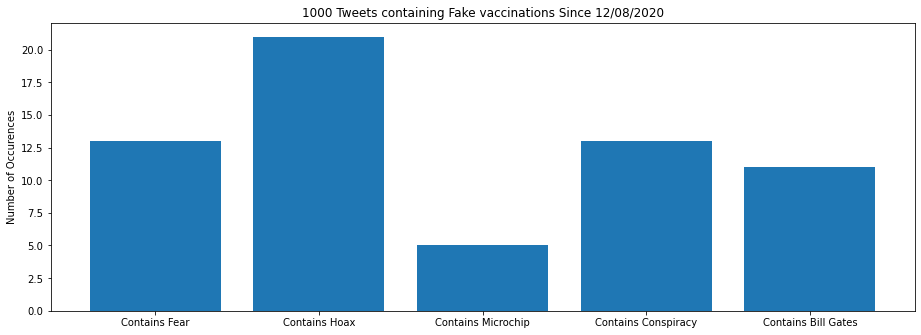

In [261]:
#Create bargraph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,1,2,1])
ax.set_title('1000 Tweets containing Fake vaccinations Since 12/08/2020')
ax.set_ylabel('Number of Occurences')
labels = ['Contains Fear', 'Contains Hoax', 'Contains Microchip', 'Contains Conspiracy', 'Contains Bill Gates']
count_tweets = [fear_num, hoax_num, microchip_num, conspiracy_num, gates_num]
ax.bar(labels,count_tweets)
plt.show()

## Tweet List At Momment

In [71]:
#Prints out tweets in list
for entry in funny_tweet_list:
    print(entry)
    print()

[datetime.datetime(2021, 1, 3, 14, 53, 43, tzinfo=datetime.timezone.utc), 1345745158353117194, '@realDonaldTrump You first call it fake then you’re boasting about the fact that the vaccines are being delivered. WTF are you delivering vaccinations for something that isn’t “ REAL “', 'Mohamme28143483', 0, 0, 0]



## Top tweets

In [79]:
#Replaces missing values with 0
fake_vac_df.fillna(value=0.0, inplace=True)
#Sorts DataFrame according to Like Count, Retweet Count, and Reply Count
fake_vac_df.sort_values(['Like Count', 'Retweet Count', 'Reply Count'], ascending=False, inplace=True)

In [83]:
#Prints out top 20
fake_vac_df.head(20)

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count
550,2020-12-21 20:33:42+00:00,1341119678177939456,i wonder if we can calculate how many black ci...,ScottAdamsSays,165,400,2481
354,2020-12-29 03:34:23+00:00,1343762260301410304,from scams soliciting donations for fake chari...,amyklobuchar,54,201,1120
312,2020-12-30 15:00:20+00:00,1344297273891590146,"non-kinetic war with china, with whiteboard, s...",ScottAdamsSays,106,164,476
656,2020-12-19 13:42:01+00:00,1340291298398486529,➡️ il s'agissait donc d'un malaise/évanouissem...,FAKE_Investiga,3,50,409
360,2020-12-29 02:32:31+00:00,1343746691367895041,"passé l'émotion et après analyse, il est clair...",christo_comte,17,66,313
389,2020-12-27 19:03:39+00:00,1343271342985019393,i overheard a convo between 2 men. one of the ...,TheMindsculpter,43,23,215
693,2020-12-19 00:12:19+00:00,1340087528838344704,more and more fake vaccinations are being give...,ChrisWickNews,9,48,199
989,2020-12-09 02:03:39+00:00,1336491671505268742,"in case you doubt it, do this at home: 1) go t...",PeterHotez,18,34,182
967,2020-12-09 15:48:52+00:00,1336699342116114432,several covid19 vaccinations have been announc...,MahaCyber1,4,50,174
39,2021-01-08 01:50:20+00:00,1347359955586670592,"with trump vowing an ""orderly transition of po...",Noahpinion,30,2,135


In [87]:
#Adds top misinformation tweets to list and prints out
top_misinformation_tweets = []
for num in [389, 693, 989, 774, 361]:
    top_misinformation_tweets.append(fake_vac_tweets_list[num])
for entry in top_misinformation_tweets:
    print(entry)
    print()

[datetime.datetime(2020, 12, 27, 19, 3, 39, tzinfo=datetime.timezone.utc), 1343271342985019393, 'I overheard a convo between 2 men. One of the men showed a video of a fake vax administration, explaining the needle didn\'t go into the skin. \n\nThe friend says "I don\'t see anything wrong, what\'s wrong with that? They aren\'t allowed to show real live vaccinations on TV!! 🤦🏽\u200d♀️', 'TheMindsculpter', 43, 23, 215]

[datetime.datetime(2020, 12, 19, 0, 12, 19, tzinfo=datetime.timezone.utc), 1340087528838344704, 'More and more fake vaccinations are being given on live TV!! Even the news is reporting on this now. Just ridiculous.', 'ChrisWickNews', 9, 48, 199]

[datetime.datetime(2020, 12, 9, 2, 3, 39, tzinfo=datetime.timezone.utc), 1336491671505268742, 'In case you doubt it, do this at home: 1) Go to “books”, 2) scroll down menu at left in middle of the page, 3) click on “health fitness dieting”, 4) new scroll down menu, 5) click on “vaccinations”, 6) watch the horror unfold, almost all

## Top Sources

In [135]:
#Groups tweets by username and then sorts and prints out top 15
user_df = fake_vac_df.groupby('Username').mean()
user_df.sort_values(['Like Count', 'Retweet Count', 'Reply Count'], ascending=False, inplace=True)
user_df.head(15)

,Tweet Id,Reply Count,Retweet Count,Like Count
Username,,,,
ScottAdamsSays,1.342708e+18,135.5,282.0,1478.5
amyklobuchar,1.343762e+18,54.0,201.0,1120.0
FAKE_Investiga,1.340291e+18,3.0,50.0,409.0
christo_comte,1.343747e+18,17.0,66.0,313.0
TheMindsculpter,1.343271e+18,43.0,23.0,215.0
ChrisWickNews,1.340088e+18,9.0,48.0,199.0
PeterHotez,1.336492e+18,18.0,34.0,182.0
MahaCyber1,1.336699e+18,4.0,50.0,174.0
Noahpinion,1.347360e+18,30.0,2.0,135.0


In [136]:
#Creates top sources list
top_sources = []
fake_vac_df[fake_vac_df['Username'] == 'TheMindsculpter']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count
389,2020-12-27 19:03:39+00:00,1343271342985019393,i overheard a convo between 2 men. one of the ...,TheMindsculpter,43,23,215


In [137]:
print(fake_vac_tweets_list[389])
top_sources.append('TheMindsculpter')

[datetime.datetime(2020, 12, 27, 19, 3, 39, tzinfo=datetime.timezone.utc), 1343271342985019393, 'I overheard a convo between 2 men. One of the men showed a video of a fake vax administration, explaining the needle didn\'t go into the skin. \n\nThe friend says "I don\'t see anything wrong, what\'s wrong with that? They aren\'t allowed to show real live vaccinations on TV!! 🤦🏽\u200d♀️', 'TheMindsculpter', 43, 23, 215]


In [138]:
fake_vac_df[fake_vac_df['Username'] == 'ChrisWickNews']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count
693,2020-12-19 00:12:19+00:00,1340087528838344704,more and more fake vaccinations are being give...,ChrisWickNews,9,48,199


In [139]:
print(fake_vac_tweets_list[693])
top_sources.append('ChrisWickNews')

[datetime.datetime(2020, 12, 19, 0, 12, 19, tzinfo=datetime.timezone.utc), 1340087528838344704, 'More and more fake vaccinations are being given on live TV!! Even the news is reporting on this now. Just ridiculous.', 'ChrisWickNews', 9, 48, 199]


In [140]:
fake_vac_df[fake_vac_df['Username'] == 'PeterHotez']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count
989,2020-12-09 02:03:39+00:00,1336491671505268742,"in case you doubt it, do this at home: 1) go t...",PeterHotez,18,34,182


In [141]:
print(fake_vac_tweets_list[989])
top_sources.append('PeterHotez')

[datetime.datetime(2020, 12, 9, 2, 3, 39, tzinfo=datetime.timezone.utc), 1336491671505268742, 'In case you doubt it, do this at home: 1) Go to “books”, 2) scroll down menu at left in middle of the page, 3) click on “health fitness dieting”, 4) new scroll down menu, 5) click on “vaccinations”, 6) watch the horror unfold, almost all fake antivaccine COVID19 conspiracies', 'PeterHotez', 18, 34, 182]


In [142]:
fake_vac_df[fake_vac_df['Username'] == 'Natalia01Mateo']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count
774,2020-12-18 05:31:51+00:00,1339805555175677953,this is becoming laughable now.\n\nso many vid...,Natalia01Mateo,9,49,115


In [143]:
print(fake_vac_tweets_list[774])
top_sources.append('Natalia01Mateo')

[datetime.datetime(2020, 12, 18, 5, 31, 51, tzinfo=datetime.timezone.utc), 1339805555175677953, 'This is becoming laughable now.\n\nSo many vids and pics of fake vaccinations....\n\n🤔 https://t.co/rQjShsyfLc', 'Natalia01Mateo', 9, 49, 115]


In [148]:
fake_vac_df[fake_vac_df['Username'] == 'teddyboylocsin']

,Datetime,Tweet Id,Text,Username,Reply Count,Retweet Count,Like Count
361,2020-12-29 01:23:53+00:00,1343729419819438082,i know the yellows will spread their usual ant...,teddyboylocsin,28,15,83


In [149]:
print(fake_vac_tweets_list[361])
top_sources.append('teddyboylocsin')

[datetime.datetime(2020, 12, 29, 1, 23, 53, tzinfo=datetime.timezone.utc), 1343729419819438082, 'I know the Yellows will spread their usual antiChinese lies but the Chinese Embassy complained to me in the strongest terms about the risks attendant to unofficial vaccinations and the baseless rumors of wide (really small) availability that invite fake—i.e. dextrose—vaccines. https://t.co/9yxK9FWtfV', 'teddyboylocsin', 28, 15, 83]


In [150]:
#Prints out top sources list
for entry in top_sources:
    print(entry)

TheMindsculpter
ChrisWickNews
PeterHotez
Natalia01Mateo
teddyboylocsin


## Funny/Crazy Tweets

In [158]:
gates_df = fake_vac_df[fake_vac_df['Text'].apply(lambda str1: fuzzy_match(str1, 'bill gates'))==True]
for num in gates_df.index:
    print(num, '\n', fake_vac_tweets_list[num])
    print()
funny_tweet_list.append(fake_vac_tweets_list[255])
funny_tweet_list.append(fake_vac_tweets_list[7])
funny_tweet_list.append(fake_vac_tweets_list[67])
funny_tweet_list.insert(0, fake_vac_tweets_list[214])
funny_tweet_list.append(fake_vac_tweets_list[786])
funny_tweet_list.append(fake_vac_tweets_list[920])

371 
 [datetime.datetime(2020, 12, 28, 13, 6, 9, tzinfo=datetime.timezone.utc), 1343543764518907904, 'Bill Gates said nothing will get to normal until he vaccinate the entite global population with the covid-19 vaccines.\n\nTo achieve this end, he has forced lockdowns, devastated economies and livelihoods of the masses.\n\nSpread enough fake news abt 2nd wave to force vaccinations 👇🏿 https://t.co/gMLIIKXgrJ', 'LandDilemma', 5, 38, 42]

255 
 [datetime.datetime(2021, 1, 1, 15, 25, 23, tzinfo=datetime.timezone.utc), 1345028353393373190, 'The CON-stitution is a piece of kak paper, and the Bill of Rights is a lot of bullshit, that protects you against fuckall..Not Lockdowns, not vaccinations, God not even against a fake virus, which is @BillGates fart..@Jagman05580158 @ConCourtSA @DrZweliMkhize https://t.co/e0gYIQqOCD', 'SeanGoss31', 0, 3, 8]

566 
 [datetime.datetime(2020, 12, 21, 13, 26, 14, tzinfo=datetime.timezone.utc), 1341012103709265921, '@RealTina40 The only reason politicians are 

In [159]:
for tweet in funny_tweet_list:
    print(tweet)
    print()

[datetime.datetime(2021, 1, 3, 13, 47, 17, tzinfo=datetime.timezone.utc), 1345728441585463296, "@realDonaldTrump @CDCgov WHY ARE YOU ENCOURAGING MILLIONS OF PEOPLE WHO TRUST YOU AND VOTED FOR YOU TO TAKE POISON 'VACCINATIONS' THAT EVEN PELOSI AND BIDEN FAKE OUT TAKE IT???? YOU KNOW EXACTLY WHAT GATES IS DOING AND ARE BEING SILENT!  I WANT AN ANSWER!", 'NaomiHu00105192', 0, 0, 0]

[datetime.datetime(2021, 1, 3, 14, 53, 43, tzinfo=datetime.timezone.utc), 1345745158353117194, '@realDonaldTrump You first call it fake then you’re boasting about the fact that the vaccines are being delivered. WTF are you delivering vaccinations for something that isn’t “ REAL “', 'Mohamme28143483', 0, 0, 0]

[datetime.datetime(2021, 1, 1, 15, 25, 23, tzinfo=datetime.timezone.utc), 1345028353393373190, 'The CON-stitution is a piece of kak paper, and the Bill of Rights is a lot of bullshit, that protects you against fuckall..Not Lockdowns, not vaccinations, God not even against a fake virus, which is @BillGate